## Ejercicio 1.6

En la base estudio.xlsx se encuentran registradas las horas de estudios referidas por un conjunto de estudiantes y su calificación en la evaluación final.

In [1]:
library(readxl)
library(ggplot2)
library(dplyr)
library(MVN)
library(corrplot)
library(aod)
library(lmtest)
library(car)
library(MASS)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


corrplot 0.92 loaded

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode



Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select




In [2]:
PARAM <- list()
PARAM$HOME <- "C://Austral/mcd-reg-adv/datasets/"
PARAM$FILE <- "estudio.csv"
file_name <- paste0(PARAM$HOME,PARAM$FILE)

In [3]:
estudio <- read.csv(file_name, sep = ";")
head(estudio)

,horas_estudio,puntaje
,<dbl>,<int>
1,1.0,28
2,1.0,38
3,1.5,45
4,1.5,44
5,2.0,52
6,2.0,50


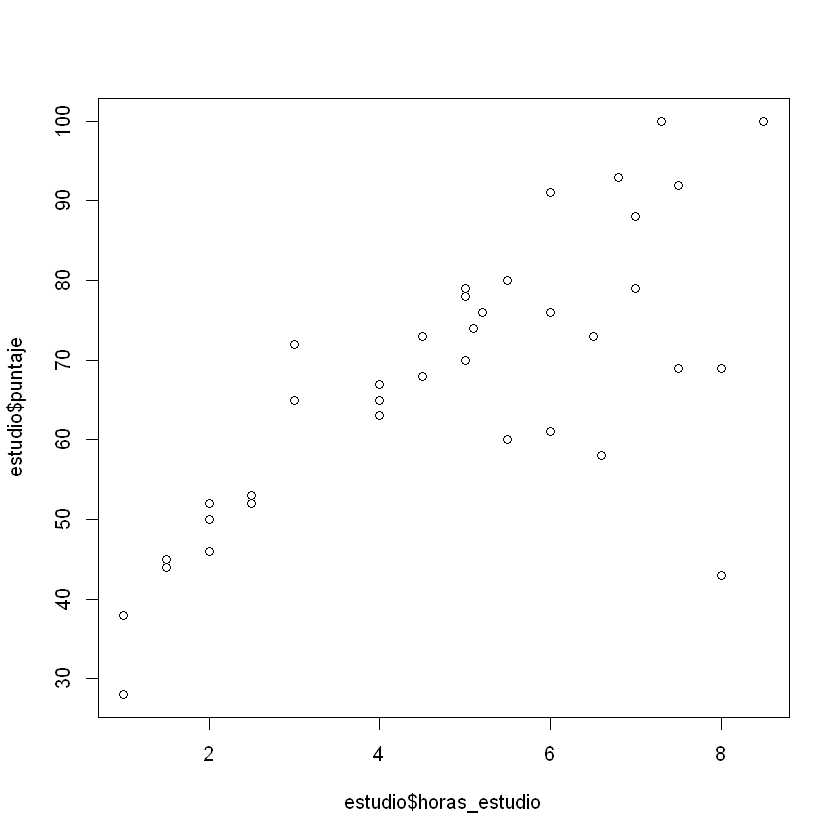

In [4]:
plot( estudio$horas_estudio, estudio$puntaje )

### a) Ajuste un modelo de regresión simple para estimar la nota final en función de las horas dedicadas al estudio.

In [5]:
mod_hs_est <- lm ( puntaje ~ horas_estudio, data = estudio )
summary( mod_hs_est )


Call:
lm(formula = puntaje ~ horas_estudio, data = estudio)

Residuals:
    Min      1Q  Median      3Q     Max 
-42.506  -4.395   1.623   8.204  18.491 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    39.8305     4.9007   8.127 1.43e-09 ***
horas_estudio   5.7094     0.9288   6.147 4.94e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.24 on 35 degrees of freedom
Multiple R-squared:  0.5192,	Adjusted R-squared:  0.5054 
F-statistic: 37.79 on 1 and 35 DF,  p-value: 4.943e-07


### b) Estudie el cumplimiento de los supuestos del modelo, gráfica y analíticamente

In [6]:
IC_mod_hs_est <- predict( mod_hs_est, 
    interval = "confidence", 
    level = 0.95 )

IP_mod_hs_est <- predict( mod_hs_est, 
    newdata =  data.frame( horas_estudio = estudio$horas_estudio ),
    interval = "prediction", 
    level = 0.95 )

datos <- data.frame ( horas_estudio = estudio$horas_estudio, puntaje = estudio$puntaje, IP_mod_hs_est )

`geom_smooth()` using formula = 'y ~ x'


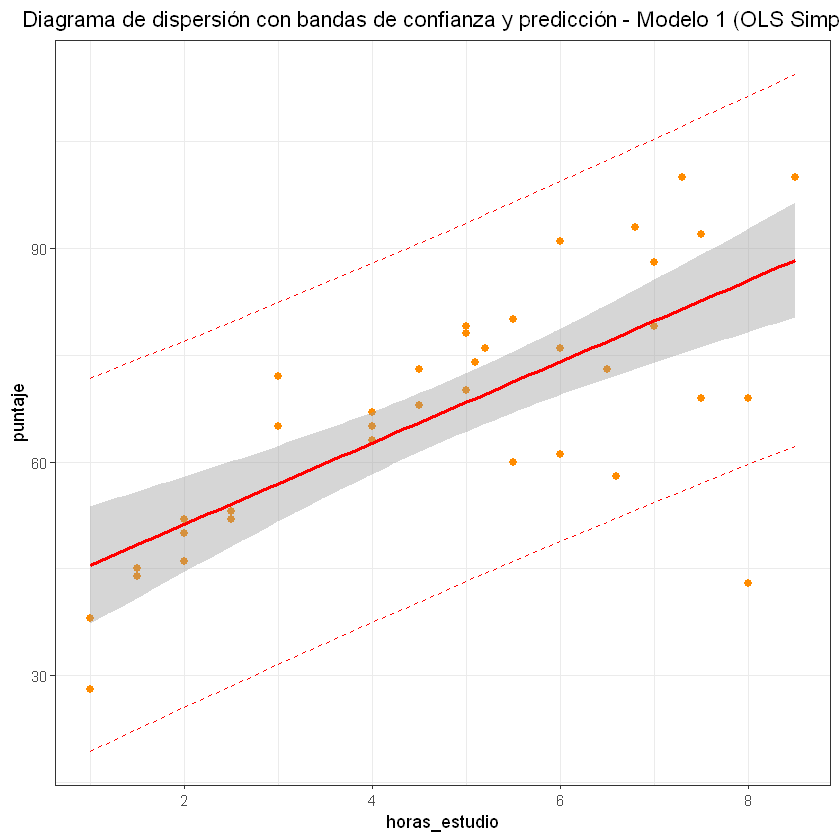

In [7]:
ggplot(data = datos, mapping = aes (x = horas_estudio, y = puntaje)) +
  geom_point(color = "darkorange", size = 2) +
  labs(title = "Diagrama de dispersión con bandas de confianza y predicción - Modelo 1 (OLS Simple)", x = "horas_estudio") + 
  geom_line(aes(y=lwr), color = "red", linetype = "dashed") +
  geom_line(aes(y=upr), color = "red", linetype = "dashed") +
  geom_smooth(method = "lm", se = TRUE, color = "red") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5))

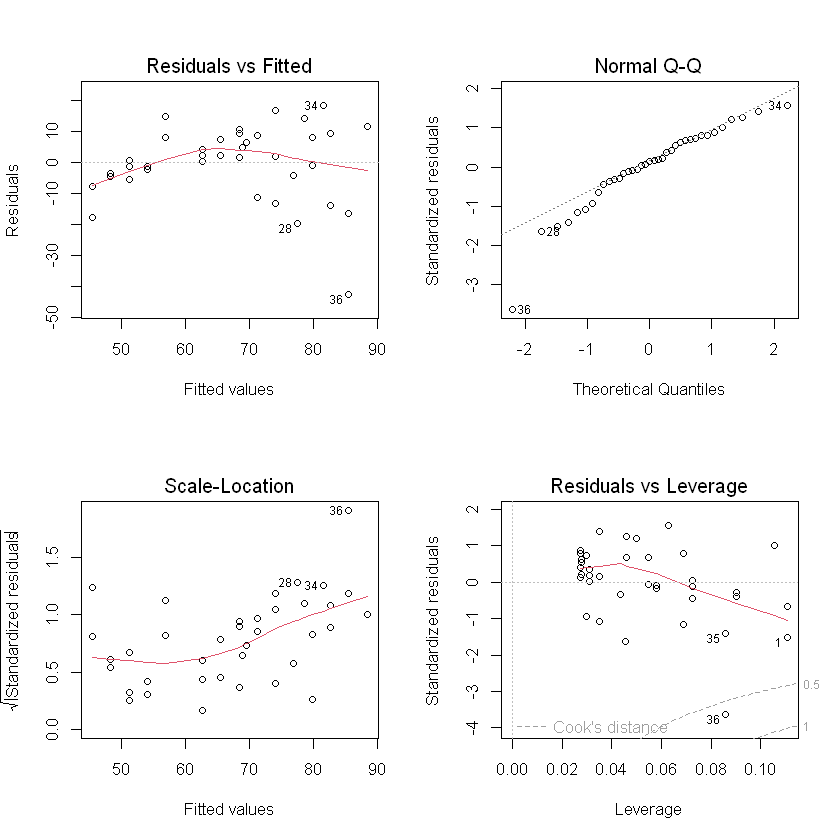

In [8]:
par( mfrow = c(2,2) )
plot( mod_hs_est )

In [9]:
shapiro.test( mod_hs_est$residuals )


	Shapiro-Wilk normality test

data:  mod_hs_est$residuals
W = 0.92105, p-value = 0.01196


Rechazo normalidad

In [10]:
bptest( mod_hs_est )


	studentized Breusch-Pagan test

data:  mod_hs_est
BP = 4.781, df = 1, p-value = 0.02877


Rechazamos H0 de homocedasticidad

In [11]:
dwt( mod_hs_est )

 lag Autocorrelation D-W Statistic p-value
   1       0.0446036      1.826352   0.484
 Alternative hypothesis: rho != 0

No rechazamos H0 de no autocorrelación

### c) Ajuste un modelo de mínimos cuadrados ponderados definiendo los pesos de tal manera que las observaciones con menor varianza tengan mas peso.

In [12]:
# Coincidiendo con Chat GPT, si lo hago por "fitted.values", R^2 cae a 0.6455

W <- 1 / ( ( mod_hs_est$residuals )^2 )  
mod_hs_est_wls <- lm ( puntaje ~ horas_estudio, data = estudio, weights = W )
summary( mod_hs_est_wls )


Call:
lm(formula = puntaje ~ horas_estudio, data = estudio, weights = W)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-1.5138 -1.0195  0.8341  0.9563  0.9914 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    39.7497     0.7773   51.14   <2e-16 ***
horas_estudio   5.7794     0.1853   31.18   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.018 on 35 degrees of freedom
Multiple R-squared:  0.9653,	Adjusted R-squared:  0.9643 
F-statistic: 972.3 on 1 and 35 DF,  p-value: < 2.2e-16


### d) Realice el análisis de diagnóstico del segundo modelo ajustado

In [13]:
shapiro.test( mod_hs_est_wls$residuals )


	Shapiro-Wilk normality test

data:  mod_hs_est_wls$residuals
W = 0.91736, p-value = 0.009279


Rechazamos H0 de normalidad (justito)

In [14]:
bptest( mod_hs_est_wls )


	studentized Breusch-Pagan test

data:  mod_hs_est_wls
BP = 0.00058108, df = 1, p-value = 0.9808


No rechazamos H0 de homocedasticidad

In [15]:
dwt( mod_hs_est_wls )

 lag Autocorrelation D-W Statistic p-value
   1      0.04612406      1.825665   0.462
 Alternative hypothesis: rho != 0

No rechazamos H0 de no autocorrelación

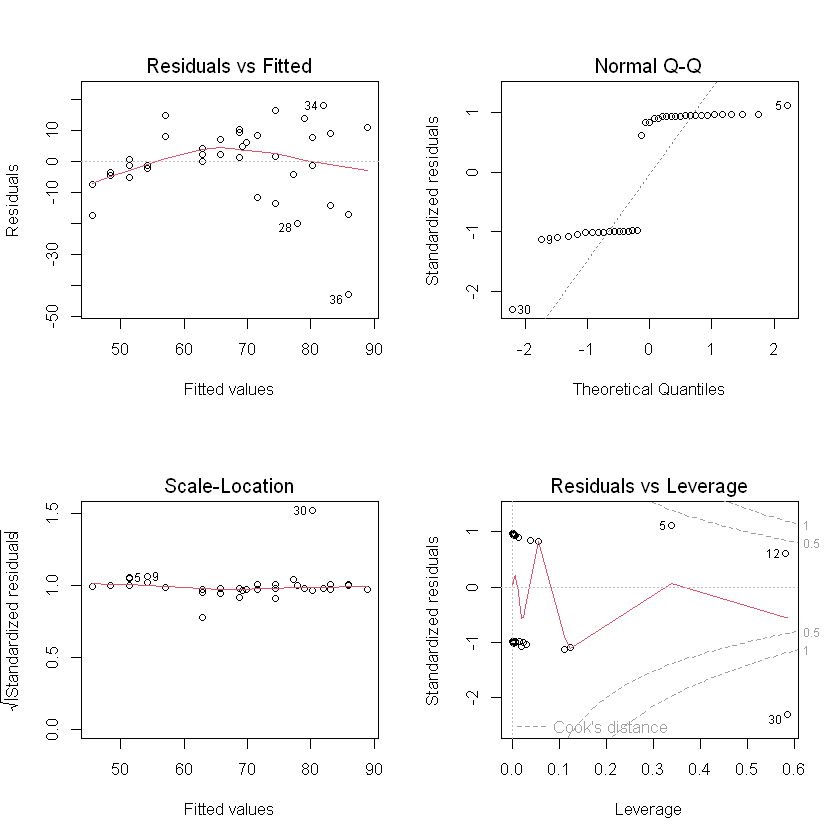

In [16]:
par( mfrow = c(2,2) )
plot( mod_hs_est_wls )

In [17]:
IC_mod_hs_est_wls <- predict( mod_hs_est_wls, 
    interval = "confidence", 
    level = 0.95 )

IP_mod_hs_est_wls <- predict( mod_hs_est_wls, 
    newdata = data.frame( horas_estudio = estudio$horas_estudio ), 
    interval = "prediction", level = 0.95 )

Warning message in predict.lm(mod_hs_est_wls, newdata = data.frame(horas_estudio = estudio$horas_estudio), :
"Assuming constant prediction variance even though model fit is weighted
"


`geom_smooth()` using formula = 'y ~ x'


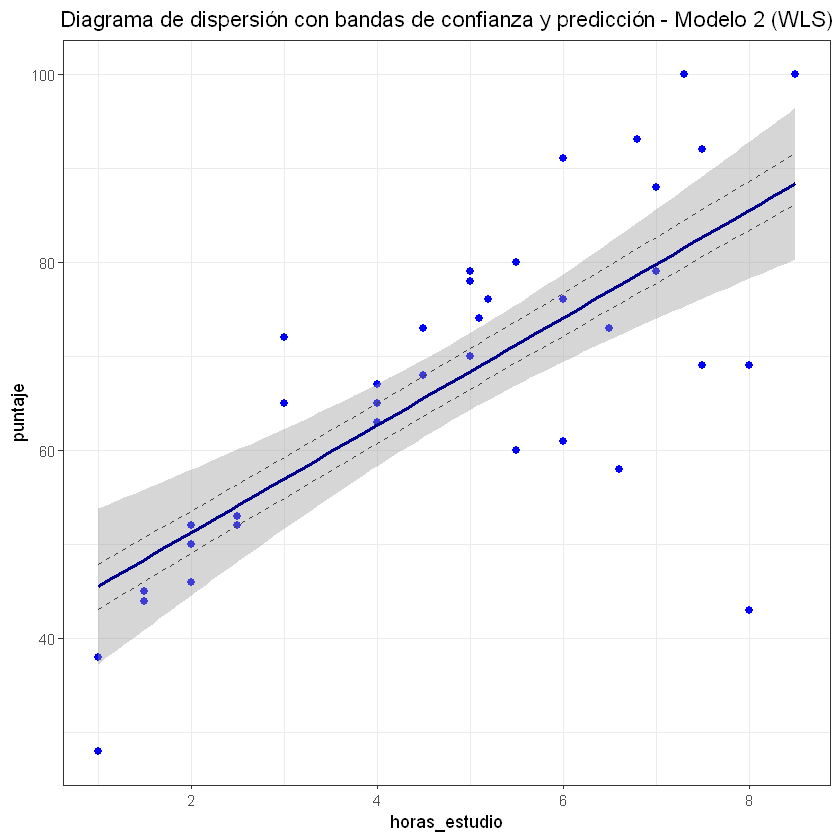

In [18]:
datos <- data.frame ( horas_estudio = estudio$horas_estudio, puntaje = estudio$puntaje, IP_mod_hs_est_wls )

ggplot( data = datos, mapping = aes (x = horas_estudio, y = puntaje) ) +
    geom_point( color = "blue", size = 2 ) +
    labs( title = "Diagrama de dispersión con bandas de confianza y predicción - Modelo 2 (WLS)", x = "horas_estudio" ) + 
    geom_line( aes(y=lwr), color = "black", linetype = "dashed" ) +
    geom_line( aes(y=upr), color = "black", linetype = "dashed" ) +
    geom_smooth( method = "lm", se = TRUE, color = "darkblue" ) +
    theme_bw() +
    theme( plot.title = element_text(hjust = 0.5) )

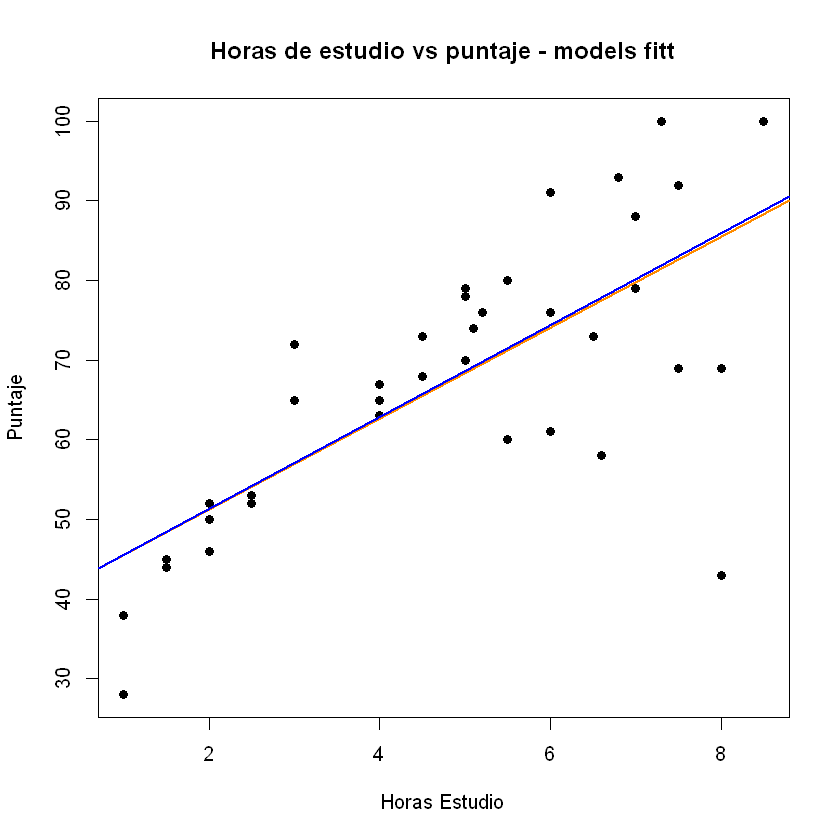

In [19]:
plot( estudio$horas_estudio, estudio$puntaje, 
    xlab = "Horas Estudio", 
    ylab = "Puntaje", 
    main = "Horas de estudio vs puntaje - models fitt", 
    pch = 16 )
abline( mod_hs_est, col = "darkorange", lwd = 2 )
abline( mod_hs_est_wls, col = "blue", lwd = 2 )

In [20]:
library( stargazer )
stargazer( mod_hs_est, mod_hs_est_wls, type = "text")


Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 





                                  Dependent variable:     
                              ----------------------------
                                        puntaje           
                                   (1)            (2)     
----------------------------------------------------------
horas_estudio                    5.709***      5.779***   
                                 (0.929)        (0.185)   
                                                          
Constant                        39.831***      39.750***  
                                 (4.901)        (0.777)   
                                                          
----------------------------------------------------------
Observations                        37            37      
R2                                0.519          0.965    
Adjusted R2                       0.505          0.964    
Residual Std. Error (df = 35)     12.245         1.018    
F Statistic (df = 1; 35)        37.788***     972.345**

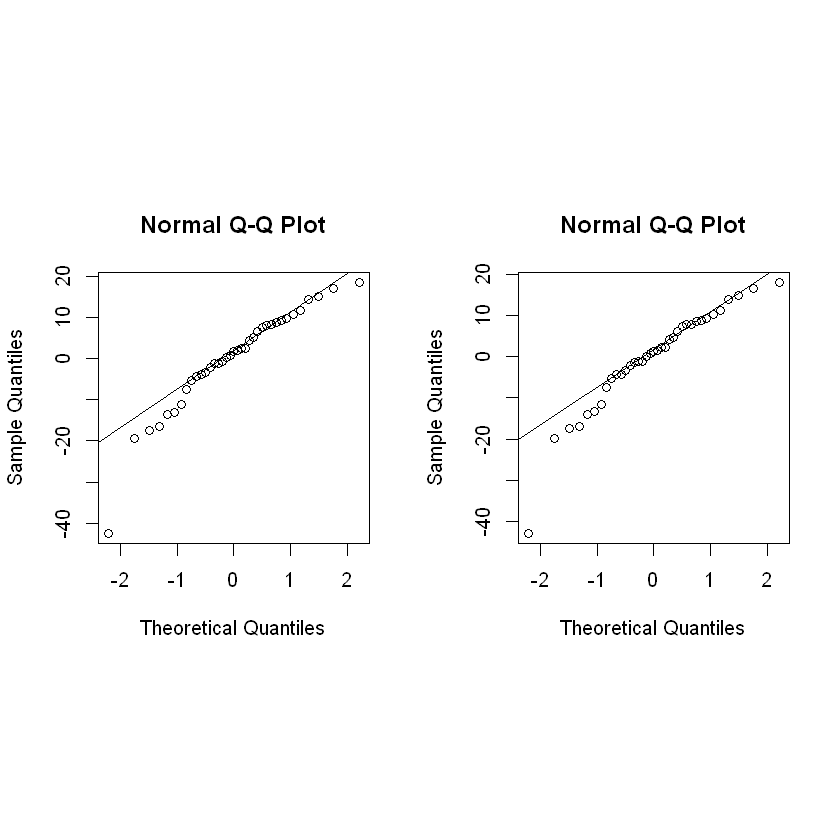

In [21]:
op <- par(pty = "s", mfrow = c(1, 2))

#Q-Q plot modelo original
qqnorm(mod_hs_est$residuals)
qqline(mod_hs_est$residuals)

#Q-Q plo Box-Cox
qqnorm(mod_hs_est_wls$residuals)
qqline(mod_hs_est_wls$residuals)

par(op)

### c) Cuadrados mínimos ponderados
### Weighted Least Squares (WLS)

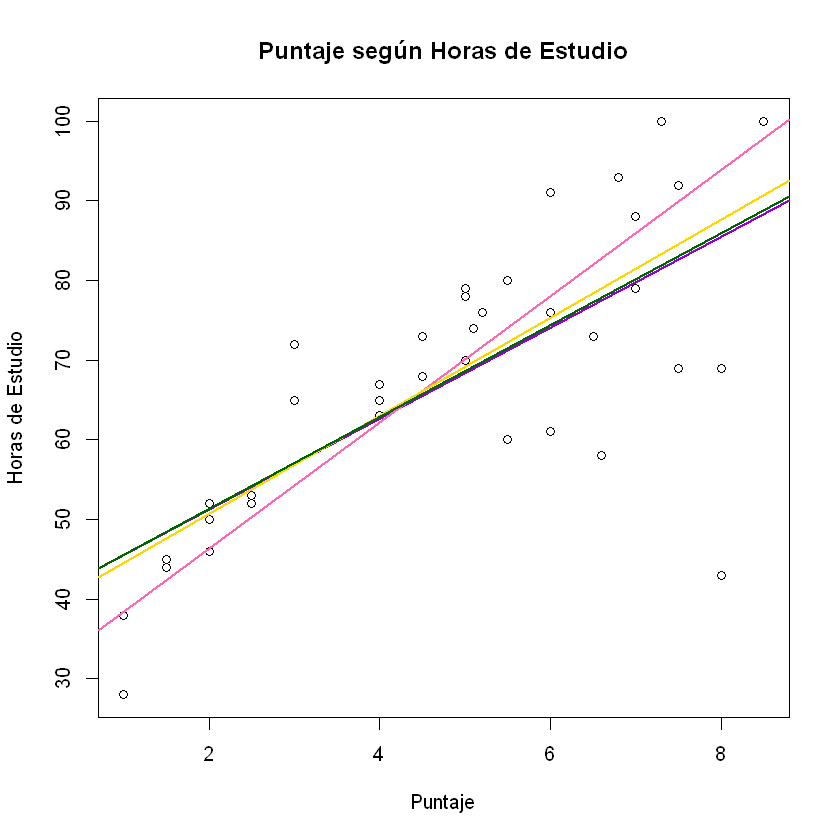

In [26]:
ww <-1 / lm( abs(mod_hs_est$residuals) ~ mod_hs_est$fitted.values)$fitted.values^2
www <-1 / ( abs(mod_hs_est$residuals) ) #^2

plot( estudio$horas_estudio, estudio$puntaje, 
     xlab="Puntaje",
     ylab="Horas de Estudio",
     main="Puntaje según Horas de Estudio")
abline( mod_hs_est, col="darkviolet", lwd=2 )

linMod_ww<- lm( puntaje ~ horas_estudio, data = estudio, weights =ww )
linMod_www<- lm( puntaje ~ horas_estudio, data = estudio, weights =www )
abline( linMod_ww, col="hotpink", lwd=2 )
abline( linMod_www, col="gold", lwd=2 )
abline( mod_hs_est_wls, col="darkgreen", lwd=2)

In [23]:
stargazer( mod_hs_est, mod_hs_est_wls, linMod_ww, linMod_www, type = "text")


                                         Dependent variable:            
                              ------------------------------------------
                                               puntaje                  
                                 (1)       (2)        (3)        (4)    
------------------------------------------------------------------------
horas_estudio                 5.709***   5.779***   7.925***   6.164*** 
                               (0.929)   (0.185)    (0.741)    (0.460)  
                                                                        
Constant                      39.831*** 39.750***  30.483***  38.364*** 
                               (4.901)   (0.777)    (2.320)    (2.052)  
                                                                        
------------------------------------------------------------------------
Observations                     37         37         37         37    
R2                              0.519     0.965   

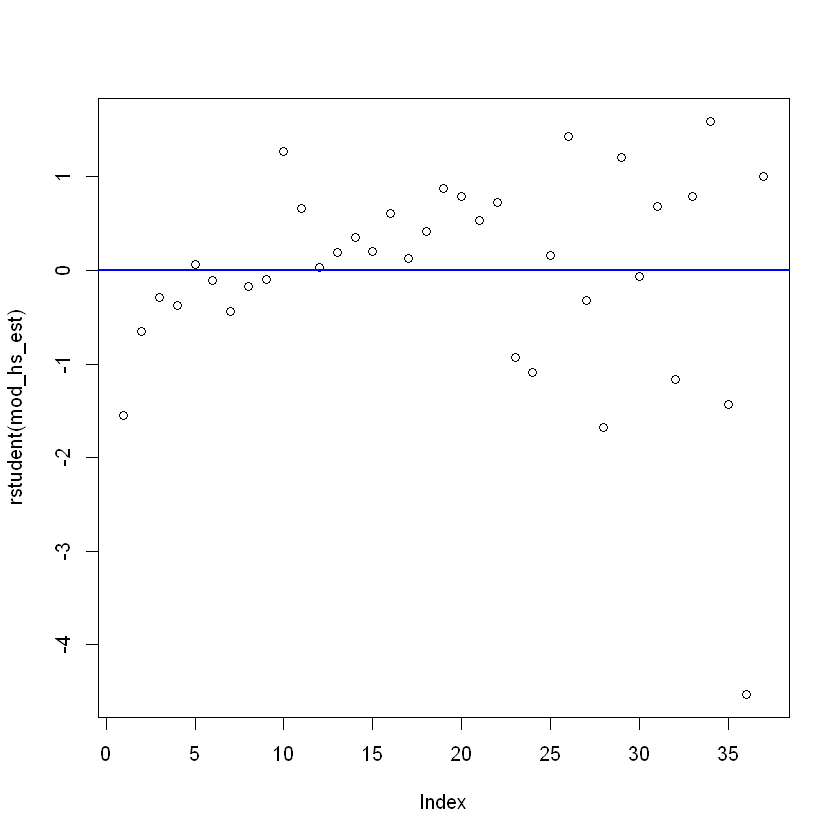

In [56]:
plot( rstudent(mod_hs_est) )
abline( h=0, col="blue", lwd=2 )

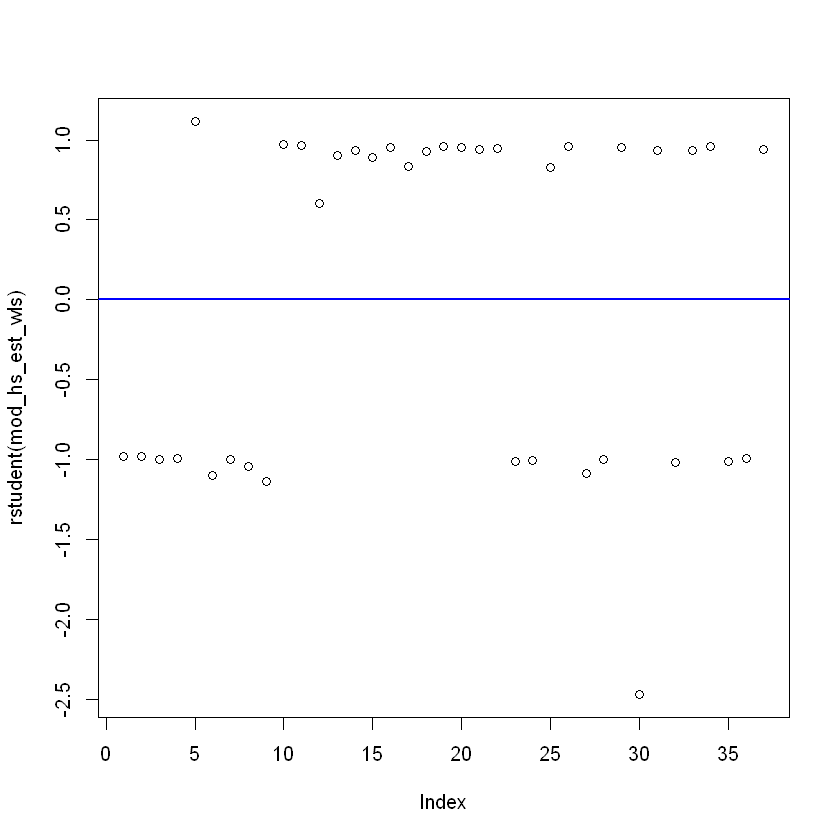

In [57]:
plot( rstudent(mod_hs_est_wls) )
abline( h=0, col="blue", lwd=2 )

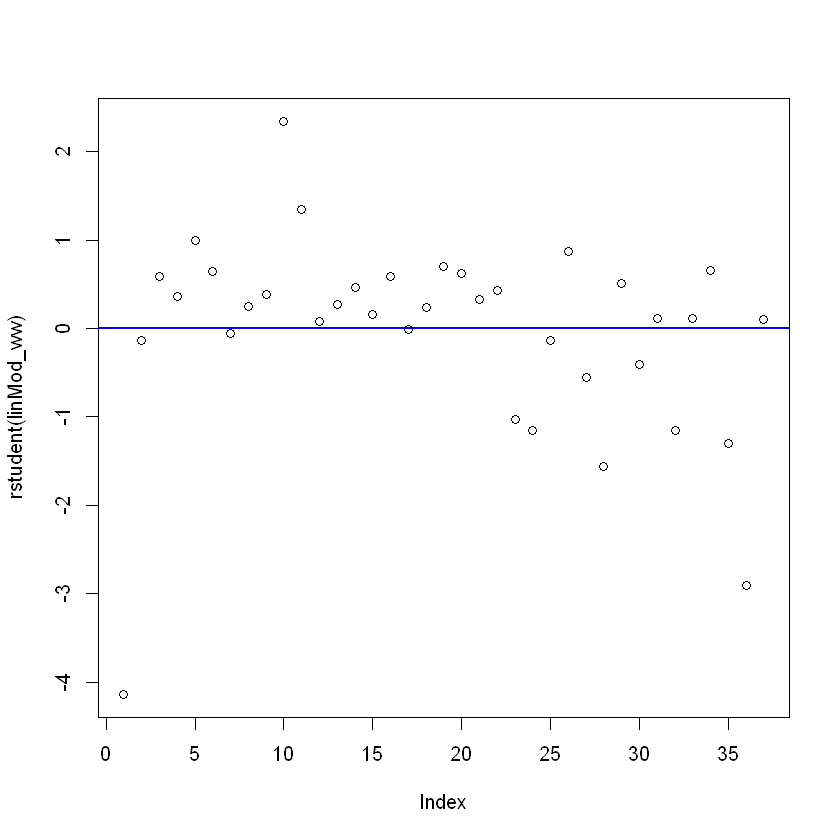

In [58]:
plot( rstudent(linMod_ww) )
abline( h=0, col="blue", lwd=2 )

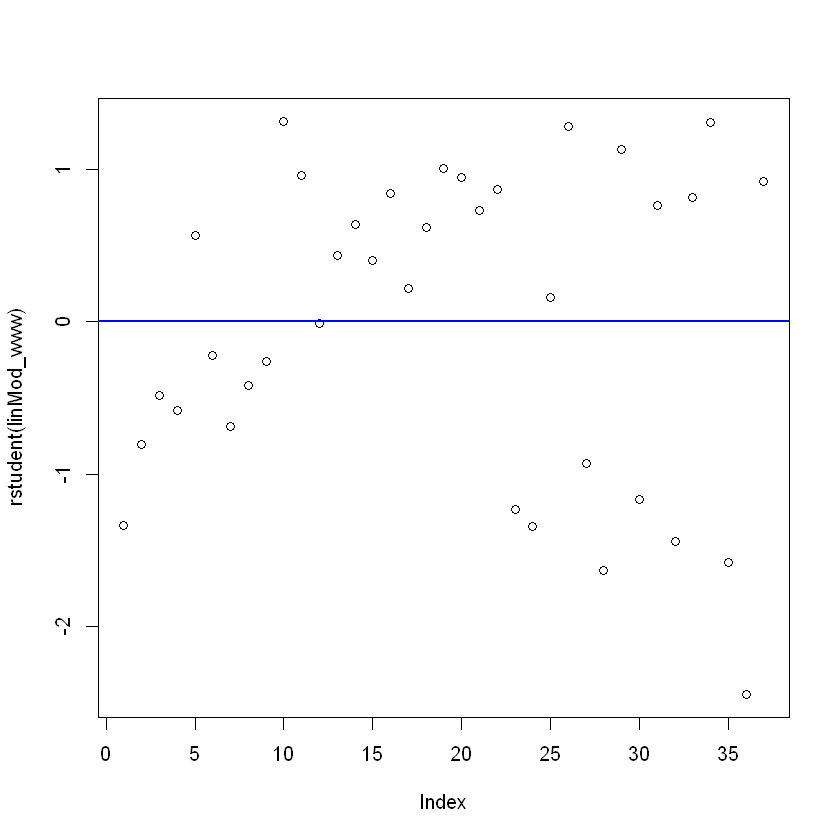

In [59]:
plot( rstudent(linMod_www) )
abline( h=0, col="blue", lwd=2 )

`geom_smooth()` using formula = 'y ~ x'


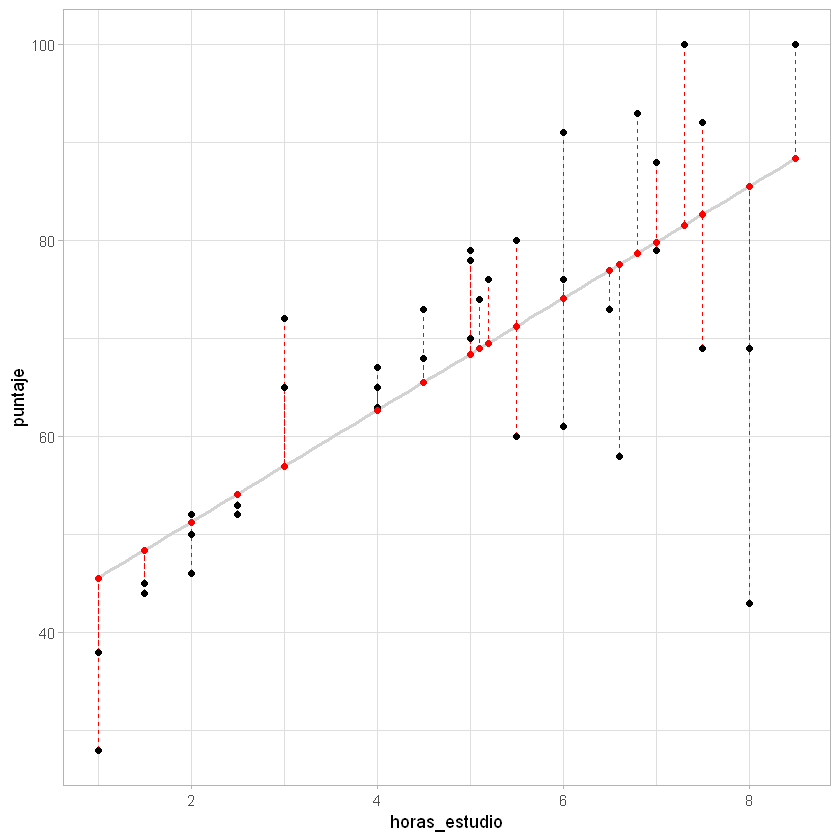

In [86]:
datos <- estudio
datos$predicciones = predict(mod_hs_est)

ggplot(datos, aes( x=horas_estudio, y=puntaje ) ) +
  geom_smooth( method="lm", se=FALSE, color="lightgrey" ) +
  geom_segment( aes( xend = horas_estudio, yend = predicciones ), col='red', lty='dashed') +
  geom_point() +
  geom_point( aes( y=predicciones), col='red' ) +
  theme_light()

In [91]:
sum( abs(mod_hs_est$residuals) )

[1] 327.6138

`geom_smooth()` using formula = 'y ~ x'


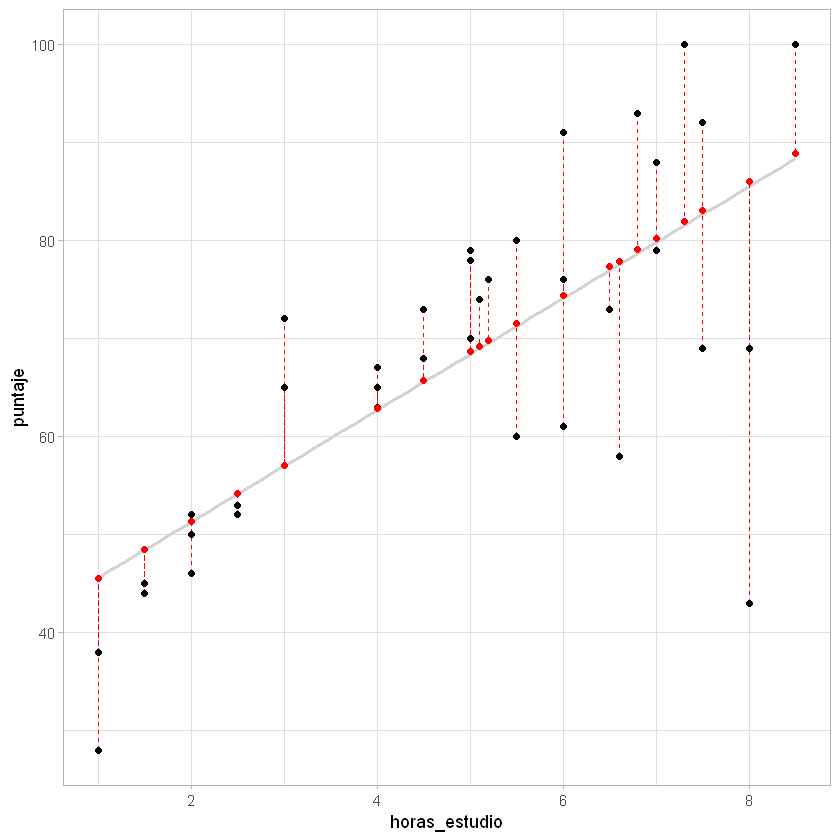

In [85]:
datos <- estudio
datos$predicciones = predict( mod_hs_est_wls )

ggplot( datos, aes( x=horas_estudio, y=puntaje ) ) +
  geom_smooth( method="lm", se=FALSE, color="lightgrey" ) +
  geom_segment( aes( xend = horas_estudio, yend = predicciones ), col='red', lty='dashed' ) +
  geom_point() +
  geom_point( aes( y=predicciones), col='red' ) +
  theme_light()

In [90]:
sum( abs( mod_hs_est_wls$residuals ) )

[1] 325.2325

[1] -9.467182

`geom_smooth()` using formula = 'y ~ x'


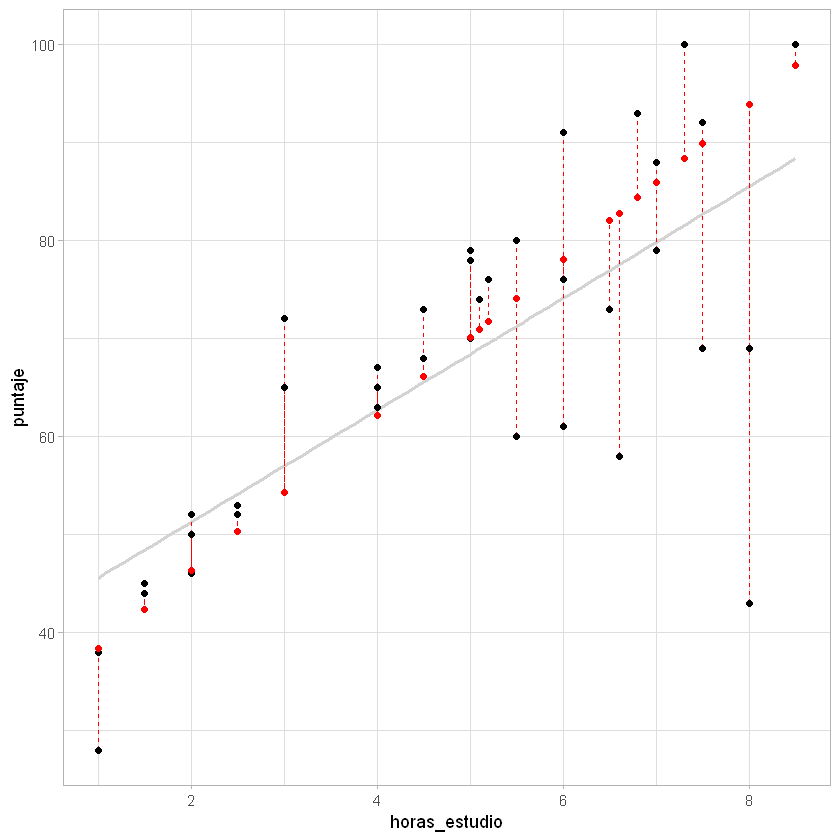

In [87]:
datos <- estudio
datos$predicciones = predict( linMod_ww )

ggplot( datos, aes( x=horas_estudio, y=puntaje ) ) +
  geom_smooth( method="lm", se=FALSE, color="lightgrey" ) +
  geom_segment( aes( xend = horas_estudio, yend = predicciones ), col='red', lty='dashed' ) +
  geom_point() +
  geom_point( aes( y=predicciones), col='red' ) +
  theme_light()

In [83]:
sum( abs( linMod_ww$residuals ) )

[1] 315.1112

`geom_smooth()` using formula = 'y ~ x'


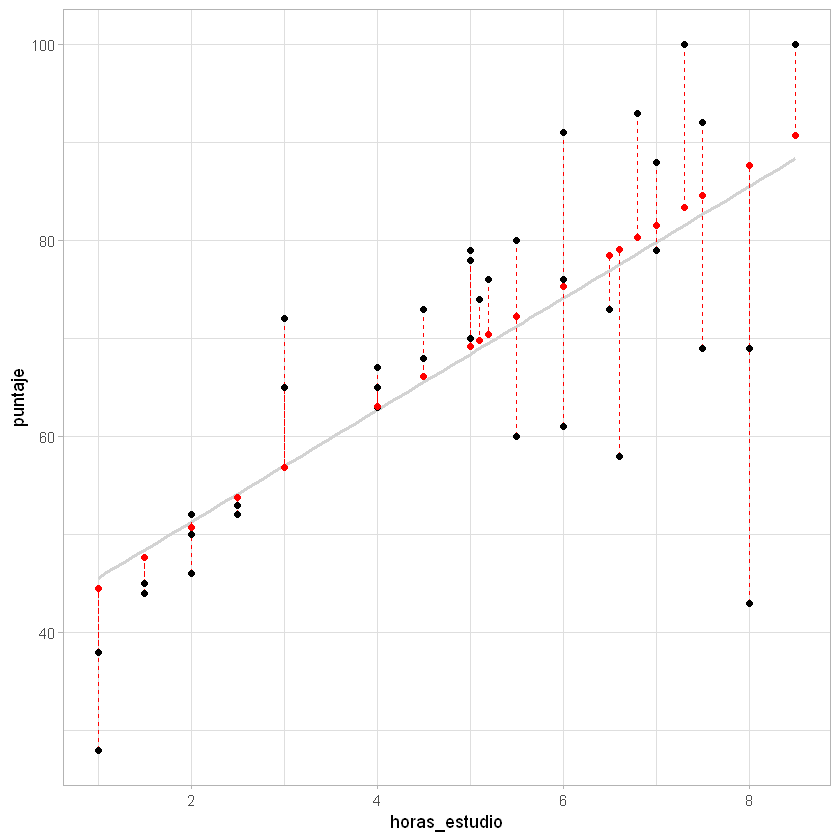

In [88]:
datos <- estudio
datos$predicciones = predict( linMod_www )

ggplot( datos, aes( x=horas_estudio, y=puntaje ) ) +
  geom_smooth( method="lm", se=FALSE, color="lightgrey" ) +
  geom_segment( aes( xend = horas_estudio, yend = predicciones ), col='red', lty='dashed' ) +
  geom_point() +
  geom_point( aes( y=predicciones), col='red' ) +
  theme_light()

In [84]:
sum( abs( linMod_www$residuals ) )

[1] 316.8958